In [1]:
import pandas as pd

In [2]:
joint_behavior = pd.read_csv("joint_behavior.csv")

In [5]:
joint_behavior

,Unnamed: 0,emo_pos,emo_neg,vocalarousal,vocalvalence,vocalpositive,vocalnegative
0,0,232.0,75.0,0.34,0.320,0.39,0.000
1,1,191.0,77.0,0.54,0.620,0.08,0.720
2,2,151.0,38.0,0.51,0.020,0.82,0.010
3,3,151.0,38.0,0.51,0.020,0.82,0.010
4,4,151.0,38.0,0.51,0.020,0.82,0.010
...,...,...,...,...,...,...,...
3824,3824,178.0,73.0,0.43,0.535,0.26,0.005
3825,3825,150.0,30.0,0.30,0.330,0.01,0.000
3826,3826,150.0,30.0,0.30,0.330,0.01,0.000
3827,3827,150.0,30.0,0.30,0.330,0.01,0.000


In [9]:
joint_behavior = joint_behavior.drop(columns="Unnamed: 0")

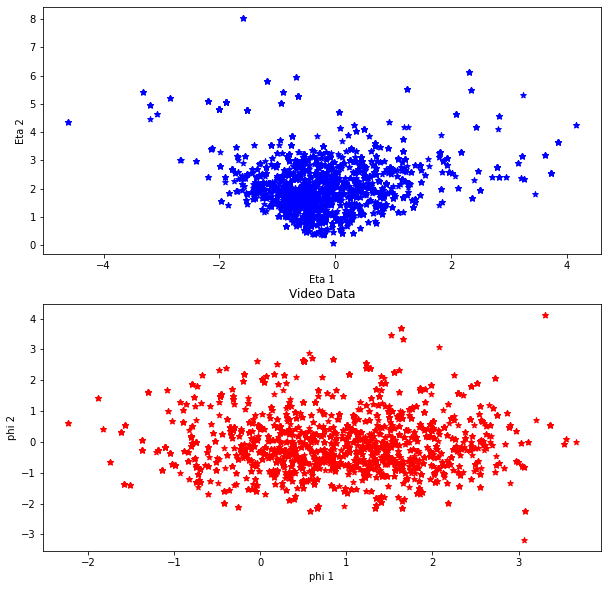

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Covariance matrix
s = joint_behavior.cov()

# Submatrices
sa = s.iloc[0:2, 0:2]
sb = s.iloc[2:6, 2:6]

# Eigen decomposition
eiga = np.linalg.eig(sa)
eigb = np.linalg.eig(sb)

# Scaling matrices
sa2 = eiga[1] @ np.diag(1/np.sqrt(eiga[0])) @ eiga[1].T
sb2 = eigb[1] @ np.diag(1/np.sqrt(eigb[0])) @ eigb[1].T

# Compute k
k = sa2 @ s.iloc[0:2, 2:6] @ sb2

# Singular Value Decomposition
si = np.linalg.svd(k)

# Compute a and b
a = sa2 @ si[0]
b = sb2 @ si[2].T

# Projections
eta = joint_behavior.iloc[:, 0:2].to_numpy() @ a[:, 0]
phi = joint_behavior.iloc[:, 2:6].to_numpy() @ b[:, 0]
eta2 = joint_behavior.iloc[:, 0:2].to_numpy() @ a[:, 1]
phi2 = joint_behavior.iloc[:, 2:6].to_numpy() @ b[:, 1]
etaphi = np.column_stack((eta, phi))

# Plot

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(eta,eta2,marker = '*',c='blue')
#plt.scatter(etaphi[:, 0], etaphi[:, 1], marker='*',c ='blue')
#for i, txt in enumerate(car.index):
#    plt.annotate(txt, (etaphi[i, 0], etaphi[i, 1]))
plt.xlabel("Eta 1")
plt.ylabel("Eta 2")
#plt.ylabel("Phi 1")
plt.subplot(2,1,2)
plt.scatter(phi,phi2,marker = '*',c='red')
#plt.scatter(etaphi[:, 0], etaphi[:, 1], marker='*',c ='blue')
#for i, txt in enumerate(car.index):
#    plt.annotate(txt, (etaphi[i, 0], etaphi[i, 1]))
plt.xlabel("phi 1")
plt.ylabel("phi 2")
plt.title("Video Data")
plt.show()


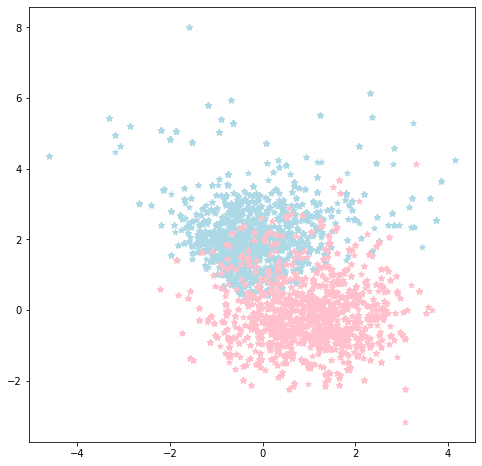

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(eta,eta2,marker='*', c = 'lightblue')
plt.scatter(phi,phi2,marker='*',c = 'pink')
plt.savefig('joint_plot.png',transparent = True)